In [12]:
!pip install nltk


  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 262.6 kB/s eta 0:00:06
    --------------------------------------- 0.0/1.5 MB 262.6 kB/s eta 0:00:06
    --------------------------------------- 0.0/1.5 MB 262.6 kB/s eta 0:00:06
   - -------------------------------------- 0.0/1.5 MB 131.3 kB/s eta 0:00:12
   - -------------------------------------- 0.0/1.5 MB 131.3 kB/s eta 0:00:12
   -- ------------------------------------- 0.1/1.5 MB 218.5 kB/s eta 0:00:07
   -- ------------------------------------- 0.1/1.5 MB 228.2 kB/s eta 0:00:07
   -- ------------------------------------- 0.1/1.5 MB 273.1 kB/s eta 0:00:06
   -- ------------------------------------- 

In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
import nltk

In [2]:
import pandas as pd
df = pd.read_csv('D:/Information Security/Phishing_Email.csv')


In [3]:
df['Label'] = df['Email Type'].apply(lambda x: 1 if x == 'Phishing Email' else 0)

In [4]:
df

,Unnamed: 0,Email Text,Email Type,Label
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email,0
1,1,the other side of * galicismos * * galicismo *...,Safe Email,0
2,2,re : equistar deal tickets are you still avail...,Safe Email,0
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email,1
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email,1
...,...,...,...,...
18645,18646,date a lonely housewife always wanted to date ...,Phishing Email,1
18646,18647,request submitted : access request for anita ....,Safe Email,0
18647,18648,"re : important - prc mtg hi dorn & john , as y...",Safe Email,0
18648,18649,press clippings - letter on californian utilit...,Safe Email,0


In [ ]:
import nltk

# Specify custom directory for NLTK data
nltk.download('all', download_dir='D:/nltk_data')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to D:/nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to D:/nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     D:/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     D:/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     D:/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers\averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     D:/nltk_data...
[nlt

True

In [5]:
# Define functions for text processing
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"<.*?>", "", text)  # Remove HTML tags
    text = re.sub(r"[^a-z\s]", "", text)  # Remove special characters
    text = re.sub(r"\d+", "", text)  # Remove digits
    return text

In [6]:
def split_words(text):
    return text.split()


In [7]:
def remove_stopwords(words):
    stop_words = set(stopwords.words('english'))
    return [word for word in words if word not in stop_words]

In [8]:
def pos_tagging(words):
    return pos_tag(words)


In [9]:
def filter_by_pos(pos_tags):
    return [word for word, tag in pos_tags if tag.startswith(('N', 'V', 'J', 'R'))]

In [10]:
def lemmatize_words(words):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

In [11]:
def process_email_text(text):
    """
    Processes the email text through all steps.
    """
    cleaned = clean_text(text)
    split = split_words(cleaned)
    filtered = remove_stopwords(split)
    tags = pos_tagging(filtered)
    selected = filter_by_pos(tags)
    lemmatized = lemmatize_words(selected)
    return " ".join(lemmatized)  # Join the words back into a processed text string

In [12]:
# Replace NaN values with an empty string in the 'Email Text' column
df['Email Text'] = df['Email Text'].fillna("")


In [13]:
# Process each email text
df['Processed Email Text'] = df['Email Text'].apply(process_email_text)


In [14]:
df['Processed Email Text']

0        disc uniformitarianism sex lang dick hudson ob...
1        side galicismos galicismo spanish term name im...
2        equistar deal ticket still available assist ro...
3        hello hot lil horny toy dream open minded pers...
4        software incredibly low price lower drapery se...
                               ...                        
18645    date lonely housewife always wanted date lonel...
18646    request submitted access request anita dupont ...
18647    important prc mtg hi dorn john discovered rece...
18648    press clipping letter californian utility plea...
18649                                                empty
Name: Processed Email Text, Length: 18650, dtype: object

In [15]:
import numpy as np

from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding
from keras.models import Sequential

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer


In [17]:
# Load your dataset
# Assume the DataFrame `df` has a column named "Processed Email Text"
texts = df['Processed Email Text'].astype(str).tolist()  # Convert to string and create a list

# Pre-trained GloVe file path (download from https://nlp.stanford.edu/projects/glove/)
glove_path = "glove.6B.100d.txt"

In [18]:
# Parameters
max_words = 20000  # Maximum vocabulary size
embedding_dim = 100  # Dimensions of GloVe embeddings
maxlen = 200  # Maximum sequence length

In [19]:
# Step 1: Tokenization and Encoding
tokenizer = Tokenizer(num_words=max_words)  # Initialize the tokenizer
tokenizer.fit_on_texts(texts)  # Fit the tokenizer on the text
word_index = tokenizer.word_index  # Dictionary mapping words to their indices

# Convert texts to sequences of integers
sequences = tokenizer.texts_to_sequences(texts)

In [20]:
padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding='post')

In [21]:
import requests
import zipfile
import os

# URL for GloVe embeddings
glove_url = "http://nlp.stanford.edu/data/glove.6B.zip"

# Destination directory
destination_dir = "D:/Information Security"
os.makedirs(destination_dir, exist_ok=True)

# File path for the zip file
zip_path = os.path.join(destination_dir, "glove.6B.zip")

# Download the GloVe zip file
print("Downloading GloVe embeddings...")
response = requests.get(glove_url, stream=True)
with open(zip_path, "wb") as f:
    for chunk in response.iter_content(chunk_size=1024):
        if chunk:
            f.write(chunk)
print("Download complete.")

# Extract the zip file
print("Extracting GloVe embeddings...")
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(destination_dir)
print("Extraction complete.")

# Path to the specific file (e.g., glove.6B.100d.txt)
glove_file_path = os.path.join(destination_dir, "glove.6B.100d.txt")
print(f"GloVe embeddings are ready at: {glove_file_path}")


Download complete.
Extracting GloVe embeddings...
Extraction complete.
GloVe embeddings are ready at: D:/Information Security\glove.6B.100d.txt


In [22]:
# Step 3: Loading Pre-trained GloVe Embeddings
embeddings_index = {}
with open(glove_path, "r", encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print(f"Loaded {len(embeddings_index)} word vectors.")

# Prepare the Embedding Matrix
num_words = min(max_words, len(word_index) + 1)
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector  # Words not found in GloVe will be all zeros
            

Loaded 400000 word vectors.


In [23]:
# Step 4: Creating the Keras Embedding Layer
embedding_layer = Embedding(
    input_dim=num_words,
    output_dim=embedding_dim,
    weights=[embedding_matrix],
    input_length=maxlen,
    trainable=False,  # Keep embeddings fixed
)


c:\Users\qasim\anaconda3\envs\py\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [24]:
# Step 5: Model Example
model = Sequential()
model.add(embedding_layer)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     2,000,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,000,000 (7.63 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,000,000 (7.63 MB)

In [56]:
# Output padded sequences
print("Padded Sequences:")
print(padded_sequences)

# Optionally: Add Padded Sequences to DataFrame
df['Padded Sequences'] = list(padded_sequences)  # Add the sequences back to the DataFrame


Padded Sequences:
[[ 2884 15641   844 ...     0     0     0]
 [  910   467   137 ...     0     0     0]
 [ 6013   101   899 ...     0     0     0]
 ...
 [  288  2747 13648 ...     0     0     0]
 [  307   199 15604 ...     0     0     0]
 [ 1040     0     0 ...     0     0     0]]


In [68]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X = np.array(df['Padded Sequences'].tolist())  # Convert padded sequences into a numpy array
y = df['Label'].values  # Assuming 'Label' column has 0 for Safe Email and 1 for Phishing Email

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense

# Define LSTM Model
def create_lstm_model(input_dim, output_dim, input_length, num_classes):
    model = Sequential()
    model.add(Input(shape=(input_length,)))  # Input layer
    model.add(Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length))  # Embedding layer
    model.add(LSTM(128, return_sequences=False))  # LSTM with return_sequences=False
    model.add(Dense(128, activation="relu"))  # Fully connected layer
    model.add(Dense(num_classes, activation="softmax"))  # Output layer
    return model

# Create and compile the model
lstm_model = create_lstm_model(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen, num_classes=2)
lstm_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


# Summary
lstm_model.summary()



Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ (None, 200, 100)       │     2,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,134,018 (8.14 MB)

 Trainable params: 2,134,018 (8.14 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
# Train the model
lstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)


Epoch 1/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 23s 95ms/step - accuracy: 0.6114 - loss: 0.6480 - val_accuracy: 0.6587 - val_loss: 0.5793
Epoch 2/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.6550 - loss: 0.5772 - val_accuracy: 0.6622 - val_loss: 0.5724
Epoch 3/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 22s 93ms/step - accuracy: 0.6717 - loss: 0.5511 - val_accuracy: 0.9062 - val_loss: 0.2659
Epoch 4/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.9066 - loss: 0.2442 - val_accuracy: 0.9563 - val_loss: 0.1308
Epoch 5/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.9676 - loss: 0.0866 - val_accuracy: 0.9638 - val_loss: 0.1028
Epoch 6/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 21s 91ms/step - accuracy: 0.9815 - loss: 0.0486 - val_accuracy: 0.9697 - val_loss: 0.0917
Epoch 7/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.9865 - loss: 0.0314 - val_accuracy: 0.9566 - val_loss: 0.1277
Epoch 8/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 21s 90ms/step - accuracy: 0.9839 - loss: 0.0325 - 

In [60]:
# Save the model after training
lstm_model.save('lstm_model.h5')  # This will save the model to a file named 'lstm_model.h5'
print("Model saved successfully!")


Model saved successfully!


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, SpatialDropout1D, Dense
from tensorflow.keras.optimizers import Adam
# Define BiLSTM Model
def create_bilstm_model(input_dim, output_dim, input_length, num_classes):
    model = Sequential()
    model.add(Input(shape=(input_length,)))
    model.add(Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length))
    model.add(SpatialDropout1D(0.2))
    model.add(Bidirectional(LSTM(128, return_sequences=False)))  # Change here: no return_sequences
    model.add(Dense(256, activation="relu"))
    model.add(Dense(num_classes, activation="softmax"))
    return model

# Compile and train the model
bilstm_model = create_bilstm_model(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen, num_classes=2)

# Model compilation and training (assuming sparse_categorical_crossentropy)
bilstm_model.compile(optimizer=Adam(), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
bilstm_model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)        │ (None, 200, 100)       │     2,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_9             │ (None, 200, 100)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ (None, 256)            │       234,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,300,802 (8.78 MB)

 Trainable params: 2,300,802 (8.78 MB)

 Non-trainable params: 0 (0.00 B)

In [70]:
# Train the model
bilstm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)


Epoch 1/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 32s 128ms/step - accuracy: 0.8323 - loss: 0.3612 - val_accuracy: 0.9657 - val_loss: 0.0992
Epoch 2/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 29s 124ms/step - accuracy: 0.9788 - loss: 0.0532 - val_accuracy: 0.9673 - val_loss: 0.0925
Epoch 3/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 29s 126ms/step - accuracy: 0.9863 - loss: 0.0285 - val_accuracy: 0.9649 - val_loss: 0.1426
Epoch 4/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 30s 129ms/step - accuracy: 0.9853 - loss: 0.0328 - val_accuracy: 0.9646 - val_loss: 0.1180
Epoch 5/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 30s 128ms/step - accuracy: 0.9867 - loss: 0.0248 - val_accuracy: 0.9558 - val_loss: 0.1921
Epoch 6/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 30s 127ms/step - accuracy: 0.9877 - loss: 0.0260 - val_accuracy: 0.9665 - val_loss: 0.1361
Epoch 7/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 29s 125ms/step - accuracy: 0.9886 - loss: 0.0214 - val_accuracy: 0.9660 - val_loss: 0.1483
Epoch 8/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 30s 130ms/step - accuracy: 0.9877 - loss: 0

In [72]:
# Save the model after training

bilstm_model.save('bilstm_model.h5') 
print("Model saved successfully!")


Model saved successfully!


In [73]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, SpatialDropout1D, GRU, Conv1D, GlobalAveragePooling1D, GlobalMaxPooling1D, Concatenate, Dense
from tensorflow.keras.optimizers import Adam

# Define GRU Model
def create_gru_model(input_dim, output_dim, input_length, num_classes):
    inputs = Input(shape=(input_length,))
    embedding = Embedding(input_dim=input_dim, output_dim=output_dim)(inputs)
    spatial_dropout = SpatialDropout1D(0.2)(embedding)
    gru = GRU(128, return_sequences=True)(spatial_dropout)
    conv1d = Conv1D(64, kernel_size=3, activation="relu")(gru)
    avg_pool = GlobalAveragePooling1D()(conv1d)
    max_pool = GlobalMaxPooling1D()(conv1d)
    concatenated = Concatenate()([avg_pool, max_pool])
    dense = Dense(128, activation="relu")(concatenated)
    outputs = Dense(num_classes, activation="softmax")(dense)
    model = Model(inputs, outputs)
    return model

# Compile and train the model
gru_model = create_gru_model(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen, num_classes=2)
gru_model.compile(optimizer=Adam(), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
gru_model.summary()


Model: "functional_54"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13      │ (None, 200)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_14        │ (None, 200, 100)  │  2,000,000 │ input_layer_13[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d_… │ (None, 200, 100)  │          0 │ embedding_14[0][… │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_1 (GRU)         │ (None, 200, 128)  │     88,320 │ spatial_dropout1… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 198, 64)   │     24,640 │ gru_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ conv1d_1[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 64)        │          0 │ conv1d_1[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 128)       │          0 │ global_average_p… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 128)       │     16,512 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 2)         │        258 │ dense_22[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,129,730 (8.12 MB)

 Trainable params: 2,129,730 (8.12 MB)

 Non-trainable params: 0 (0.00 B)

In [74]:
# Train the model
gru_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 25s 101ms/step - accuracy: 0.8182 - loss: 0.3453 - val_accuracy: 0.9697 - val_loss: 0.0758
Epoch 2/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 23s 99ms/step - accuracy: 0.9816 - loss: 0.0439 - val_accuracy: 0.9678 - val_loss: 0.0911
Epoch 3/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 23s 97ms/step - accuracy: 0.9872 - loss: 0.0288 - val_accuracy: 0.9700 - val_loss: 0.1148
Epoch 4/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 23s 98ms/step - accuracy: 0.9867 - loss: 0.0233 - val_accuracy: 0.9681 - val_loss: 0.0930
Epoch 5/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 23s 97ms/step - accuracy: 0.9832 - loss: 0.0318 - val_accuracy: 0.9627 - val_loss: 0.1362
Epoch 6/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 23s 97ms/step - accuracy: 0.9895 - loss: 0.0223 - val_accuracy: 0.9668 - val_loss: 0.1415
Epoch 7/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 23s 97ms/step - accuracy: 0.9897 - loss: 0.0210 - val_accuracy: 0.9635 - val_loss: 0.1538
Epoch 8/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 23s 96ms/step - accuracy: 0.9889 - loss: 0.0222 -

In [84]:
gru_model.save('gru_model.h5') 
print("Model saved successfully!")

Model saved successfully!


In [76]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, SpatialDropout1D, GRU, Conv1D, GlobalAveragePooling1D, GlobalMaxPooling1D, Concatenate, Dense,Bidirectional
from tensorflow.keras.optimizers import Adam
# Define BiGRU Model
def create_bigru_model(input_dim, output_dim, input_length, num_classes):
    inputs = Input(shape=(input_length,))
    embedding = Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length)(inputs)
    spatial_dropout = SpatialDropout1D(0.2)(embedding)
    bigru = Bidirectional(GRU(128, return_sequences=True))(spatial_dropout)
    conv1d = Conv1D(64, kernel_size=3, activation="relu")(bigru)
    avg_pool = GlobalAveragePooling1D()(conv1d)
    max_pool = GlobalMaxPooling1D()(conv1d)
    concatenated = Concatenate()([avg_pool, max_pool])
    dense = Dense(128, activation="relu")(concatenated)
    outputs = Dense(num_classes, activation="softmax")(dense)
    model = Model(inputs, outputs)
    return model

# Compile and train the model
bigru_model = create_bigru_model(input_dim=num_words, output_dim=embedding_dim, input_length=maxlen, num_classes=2)
bigru_model.compile(optimizer=Adam(), loss="sparse_categorical_crossentropy", metrics=["accuracy"])
bigru_model.summary()

c:\Users\qasim\anaconda3\envs\py\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_56"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14      │ (None, 200)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_15        │ (None, 200, 100)  │  2,000,000 │ input_layer_14[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d_… │ (None, 200, 100)  │          0 │ embedding_15[0][… │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_8     │ (None, 200, 256)  │    176,640 │ spatial_dropout1… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 198, 64)   │     49,216 │ bidirectional_8[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ conv1d_2[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 64)        │          0 │ conv1d_2[0][0]    │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 128)       │          0 │ global_average_p… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, 128)       │     16,512 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 2)         │        258 │ dense_24[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,242,626 (8.55 MB)

 Trainable params: 2,242,626 (8.55 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:
# Train the model
bigru_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 39s 158ms/step - accuracy: 0.8058 - loss: 0.4086 - val_accuracy: 0.9673 - val_loss: 0.0881
Epoch 2/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 36s 155ms/step - accuracy: 0.9772 - loss: 0.0517 - val_accuracy: 0.9708 - val_loss: 0.0810
Epoch 3/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 37s 160ms/step - accuracy: 0.9852 - loss: 0.0283 - val_accuracy: 0.9694 - val_loss: 0.1021
Epoch 4/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 38s 163ms/step - accuracy: 0.9876 - loss: 0.0244 - val_accuracy: 0.9499 - val_loss: 0.1412
Epoch 5/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 38s 163ms/step - accuracy: 0.9840 - loss: 0.0266 - val_accuracy: 0.9676 - val_loss: 0.1351
Epoch 6/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 39s 165ms/step - accuracy: 0.9848 - loss: 0.0260 - val_accuracy: 0.9643 - val_loss: 0.1305
Epoch 7/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 38s 163ms/step - accuracy: 0.9869 - loss: 0.0230 - val_accuracy: 0.9676 - val_loss: 0.1509
Epoch 8/10
234/234 ━━━━━━━━━━━━━━━━━━━━ 39s 165ms/step - accuracy: 0.9880 - loss: 0

In [83]:
bigru_model.save('bigru_model.h5') 
print("Model saved successfully!")

Model saved successfully!


59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step


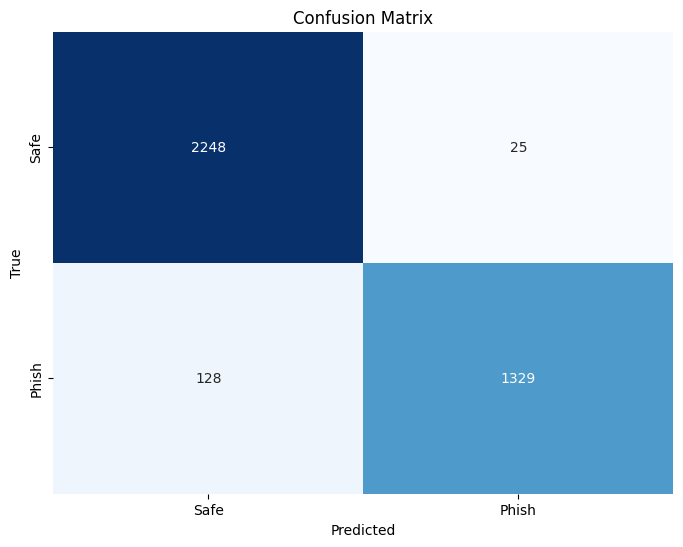


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2273
           1       0.98      0.91      0.95      1457

    accuracy                           0.96      3730
   macro avg       0.96      0.95      0.96      3730
weighted avg       0.96      0.96      0.96      3730



In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Assuming the model is trained, predict on the validation data (X_test)
y_pred = lstm_model.predict(X_test, batch_size=64)

# Convert the predicted values to class labels (for sparse_categorical_crossentropy, this will be integers)
y_pred_labels = np.argmax(y_pred, axis=-1)

# Ensure y_test is one-hot encoded, if not, convert it to integer labels
if len(y_test.shape) > 1:  # If it's one-hot encoded (2D)
    y_test_labels = np.argmax(y_test, axis=-1)
else:
    y_test_labels = y_test  # If it's already a 1D array of labels

# Ensure y_test_labels is a numpy array
y_test_labels = np.array(y_test_labels)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Plot the confusion matrix with seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Safe', 'Phish'], yticklabels=['Safe', 'Phish'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Compute the classification report (precision, recall, f1-score)
class_report = classification_report(y_test_labels, y_pred_labels)

# Print the classification report
print("\nClassification Report:")
print(class_report)


59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step
Shape of y_test_labels: (3730,)
Shape of y_pred_labels: (3730,)


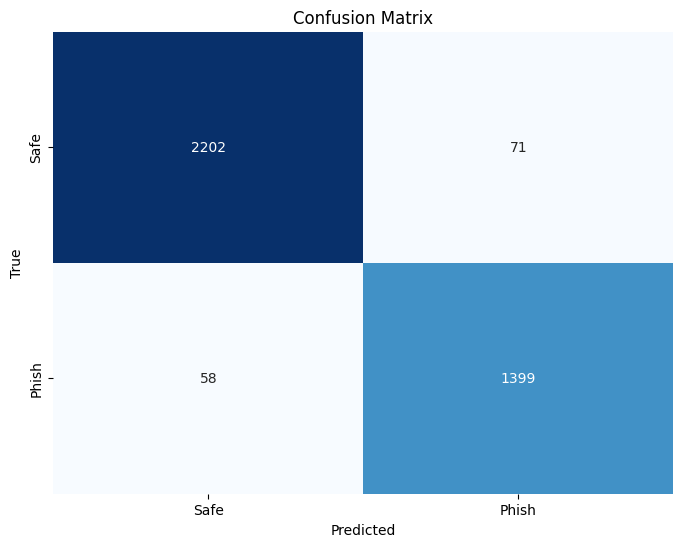

Confusion Matrix:
[[2202   71]
 [  58 1399]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2273
           1       0.95      0.96      0.96      1457

    accuracy                           0.97      3730
   macro avg       0.96      0.96      0.96      3730
weighted avg       0.97      0.97      0.97      3730



In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Assuming the model is trained, predict on the validation data (X_test)
y_pred = bilstm_model.predict(X_test, batch_size=64)

# Convert the predicted values to class labels (for sparse_categorical_crossentropy, this will be integers)
y_pred_labels = np.argmax(y_pred, axis=-1)

# Ensure y_test is one-hot encoded, if not, convert it to integer labels
# If y_test is one-hot encoded, convert it to a 1D array of class labels
if len(y_test.shape) > 1:  # If it's one-hot encoded (2D)
    y_test_labels = np.argmax(y_test, axis=-1)
else:
    y_test_labels = y_test  # If it's already a 1D array of labels

# Ensure y_test_labels is a numpy array
y_test_labels = np.array(y_test_labels)

# Check the shapes to ensure they are correct
print("Shape of y_test_labels:", y_test_labels.shape)
print("Shape of y_pred_labels:", y_pred_labels.shape)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

# Plot the confusion matrix with seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Safe', 'Phish'], yticklabels=['Safe', 'Phish'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Compute the classification report (precision, recall, f1-score)
class_report = classification_report(y_test_labels, y_pred_labels)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)


59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step
Shape of y_test_labels: (3730,)
Shape of y_pred_labels: (3730,)


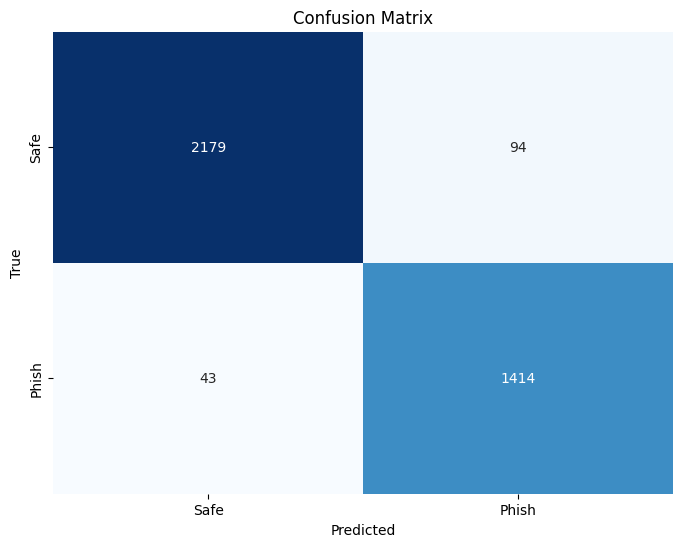

Confusion Matrix:
[[2179   94]
 [  43 1414]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2273
           1       0.94      0.97      0.95      1457

    accuracy                           0.96      3730
   macro avg       0.96      0.96      0.96      3730
weighted avg       0.96      0.96      0.96      3730



In [81]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Assuming the model is trained, predict on the validation data (X_test)
y_pred = gru_model.predict(X_test, batch_size=64)

# Convert the predicted values to class labels (for sparse_categorical_crossentropy, this will be integers)
y_pred_labels = np.argmax(y_pred, axis=-1)

# Ensure y_test is one-hot encoded, if not, convert it to integer labels
# If y_test is one-hot encoded, convert it to a 1D array of class labels
if len(y_test.shape) > 1:  # If it's one-hot encoded (2D)
    y_test_labels = np.argmax(y_test, axis=-1)
else:
    y_test_labels = y_test  # If it's already a 1D array of labels

# Ensure y_test_labels is a numpy array
y_test_labels = np.array(y_test_labels)

# Check the shapes to ensure they are correct
print("Shape of y_test_labels:", y_test_labels.shape)
print("Shape of y_pred_labels:", y_pred_labels.shape)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
# Plot the confusion matrix with seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Safe', 'Phish'], yticklabels=['Safe', 'Phish'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Compute the classification report (precision, recall, f1-score)
class_report = classification_report(y_test_labels, y_pred_labels)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)


59/59 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step
Shape of y_test_labels: (3730,)
Shape of y_pred_labels: (3730,)


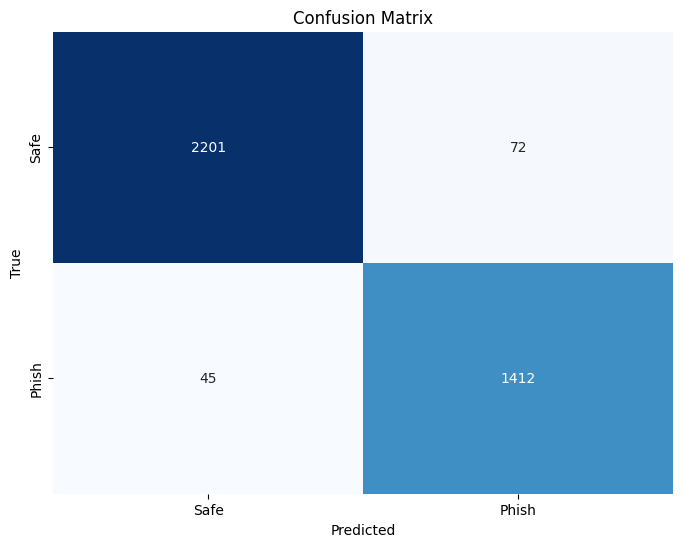

Confusion Matrix:
[[2201   72]
 [  45 1412]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2273
           1       0.95      0.97      0.96      1457

    accuracy                           0.97      3730
   macro avg       0.97      0.97      0.97      3730
weighted avg       0.97      0.97      0.97      3730



In [82]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Assuming the model is trained, predict on the validation data (X_test)
y_pred = bigru_model.predict(X_test, batch_size=64)

# Convert the predicted values to class labels (for sparse_categorical_crossentropy, this will be integers)
y_pred_labels = np.argmax(y_pred, axis=-1)

# Ensure y_test is one-hot encoded, if not, convert it to integer labels
# If y_test is one-hot encoded, convert it to a 1D array of class labels
if len(y_test.shape) > 1:  # If it's one-hot encoded (2D)
    y_test_labels = np.argmax(y_test, axis=-1)
else:
    y_test_labels = y_test  # If it's already a 1D array of labels

# Ensure y_test_labels is a numpy array
y_test_labels = np.array(y_test_labels)

# Check the shapes to ensure they are correct
print("Shape of y_test_labels:", y_test_labels.shape)
print("Shape of y_pred_labels:", y_pred_labels.shape)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)
# Plot the confusion matrix with seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Safe', 'Phish'], yticklabels=['Safe', 'Phish'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Compute the classification report (precision, recall, f1-score)
class_report = classification_report(y_test_labels, y_pred_labels)

# Print confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)
